# Predicting Customer Churn

### 1. Data Preparation

In [1]:
# importing modules
import pandas as pd
import numpy as np
import locale
from datetime import datetime as dt
import matplotlib.pyplot as plt
%matplotlib inline

#Displaying all dataframe columns
pd.set_option('display.max_columns', None)

In [2]:
#Loading datasets
base_movimientos = pd.read_fwf('BASE_MOVIMIENTOS.txt')
base_movimientos.head()

,ID,FECHA_INFORMACION,SALDO_AHORROS,SALDO_FONDOS,SALDO_CREDITO1,SALDO_CREDITO2,SALDO_TARJETA,MONTO_COMPRAS1,MONTO_CAJERO1,MONTO_COMPRAS2,MONTO_CAJERO2,MONTO_ABONOS_NOMINA,INDICADOR_MORA,SALDO_ACTIVO,SALDO_PASIVO
0,3,01JUL2017:00:00:00,3340.00,"0,00","$ 876.047,06","$ 0,00",0.0,0.0,0.0,0.0,0.0,0.0,0,"876047,06",3340
1,171,01MAY2017:00:00:00,1070130.00,"0,00","$ 7.828.500,12","$ 0,00",0.0,0.0,0.0,0.0,460000.0,897220.0,0,"7828500,12","1070133,18"
2,313,01OCT2017:00:00:00,0.00,"0,00","$ 0,00","$ 0,00",0.0,0.0,0.0,0.0,0.0,0.0,0,0,0
3,644,01MAY2017:00:00:00,2204.88,"0,00","$ 8.863.156,75","$ 0,00",2153170.0,359023.0,0.0,8000.0,160000.0,748000.0,0,"11016329,89","2204,88"
4,1445,01DEC2016:00:00:00,692926.00,"0,00","$ 0,00","$ 0,00",0.0,0.0,0.0,0.0,0.0,606720.0,0,0,"692926,32"


In [3]:
base_movimientos.dtypes

ID                       int64
FECHA_INFORMACION       object
SALDO_AHORROS          float64
SALDO_FONDOS            object
SALDO_CREDITO1          object
SALDO_CREDITO2          object
SALDO_TARJETA          float64
MONTO_COMPRAS1         float64
MONTO_CAJERO1          float64
MONTO_COMPRAS2         float64
MONTO_CAJERO2          float64
MONTO_ABONOS_NOMINA    float64
INDICADOR_MORA           int64
SALDO_ACTIVO            object
SALDO_PASIVO            object
dtype: object

After loading the dataset and looking at the dtypes, the following changes will be made: 

- `FECHA_INFORMACION` will be transformed to datetime
- `SALDO_FONDOS`, `SALDO_CREDITO1`, `SALDO_CREDITO2`, `SALDO_ACTIVO` and `SALDO_PASIVO` will be transformed to float

In [4]:
locale.setlocale(locale.LC_ALL,'en_US.UTF-8')
# converting object to datetime
base_movimientos['FECHA_INFORMACION'] = pd.to_datetime(base_movimientos['FECHA_INFORMACION'], format='%d%b%Y:%H:%M:%S')

# converting currency to float
to_float = ['SALDO_FONDOS','SALDO_CREDITO1','SALDO_CREDITO2', 'SALDO_ACTIVO','SALDO_PASIVO']
for col in to_float:
    base_movimientos[col] = base_movimientos[col].replace('[\$.]', '', regex=True).replace(',', '.',regex=True).astype(float)

base_movimientos.head()

,ID,FECHA_INFORMACION,SALDO_AHORROS,SALDO_FONDOS,SALDO_CREDITO1,SALDO_CREDITO2,SALDO_TARJETA,MONTO_COMPRAS1,MONTO_CAJERO1,MONTO_COMPRAS2,MONTO_CAJERO2,MONTO_ABONOS_NOMINA,INDICADOR_MORA,SALDO_ACTIVO,SALDO_PASIVO
0,3,2017-07-01,3340.00,0.0,876047.06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,876047.06,3340.00
1,171,2017-05-01,1070130.00,0.0,7828500.12,0.0,0.0,0.0,0.0,0.0,460000.0,897220.0,0,7828500.12,1070133.18
2,313,2017-10-01,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.00,0.00
3,644,2017-05-01,2204.88,0.0,8863156.75,0.0,2153170.0,359023.0,0.0,8000.0,160000.0,748000.0,0,11016329.89,2204.88
4,1445,2016-12-01,692926.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,606720.0,0,0.00,692926.32


In [5]:
#Loading datasets
base_id = pd.read_csv('BASE_ID.txt', sep='\t')
base_id.head()

,CLIENTE_CC,FECHA_ALTA,FECHA_NACIMIENTO,SEXO,ESTADO_CIVIL,SITUACION_LABORAL,fuga,MES_DE_FUGA
0,"1,00",sep301996,19300823,F,CASADO,otros,1.0,2.0
1,"2,00",may011986,19530630,HOMBRE,UNION LIBRE,Contrato fijo,NaN,NaN
2,"3,00",dic011994,19540721,F,UNION LIBRE,OTROS,1.0,11.0
3,"4,00",ago271997,19390503,M,CASADO,OTROS,NaN,NaN
4,"5,00",jul211997,19311013,F,CASADO,contrato autonomo.,NaN,NaN


After loading the dataset and looking at the information, the following changes will be made:

- `CLIENTE_CC` and `fuga` will be renamed to `ID` and `FUGA` respectively
- `ID` will be transformed to int
- Values in column `SEXO` will be changed to F for female and M for male
- Values in column `SITUACION_LABORAL` will be changed to OTROS, CONTRATO FIJO,CONTRATO AUTONOMO, SIN CLASIFICAR and CONTRATO TEMPORAL
- `FECHA_ALTA` and `FECHA_NACIMIENTO` will be transformed to datetime

In [6]:
# Renaming columns
base_id = base_id.rename(columns={'CLIENTE_CC':'ID', 'fuga':'FUGA'})

# Converting string to int
base_id['ID'] = base_id['ID'].replace(',', '.', regex=True).astype(float)
base_id['ID'] = base_id['ID'].astype(dtype=np.int64)

#Changing values to F for female and M for male
base_id['SEXO'] = base_id['SEXO'].replace({'HOMBRE':'M', 'Hombre':'M', 'mujer':'F', 'femenino':'F', 
                                           'masculino':'M','FEMENINO':'F','Mujer':'F', 'varón':'M', 'Masc.':'M', 
                                           'MUJER':'F'})
#Changing values
base_id['SITUACION_LABORAL'] = base_id['SITUACION_LABORAL'].replace({'otros':'OTROS', 'Contrato fijo':'CONTRATO FIJO', 
                                                                     'contrato autonomo.':'CONTRATO AUTONOMO',
                                                                     ' desconocido   ': 'SIN CLASIFICAR', 
                                                                     'temporal     ':'CONTRATO TEMPORAL'})

In [7]:
# converting object to datetime
locale.setlocale(locale.LC_ALL,'es_ES.UTF-8')
for i, date in enumerate(base_id['FECHA_ALTA']):
    base_id.iloc[i,1] = dt.strptime(date, '%b%d%Y')
locale.setlocale(locale.LC_ALL,'en_US.UTF-8')
base_id['FECHA_ALTA'] = pd.to_datetime(base_id['FECHA_ALTA'], format='%Y%m%d')

# converting object to datetime
locale.setlocale(locale.LC_ALL,'es_ES.UTF-8')
base_id['FECHA_NACIMIENTO'] = base_id['FECHA_NACIMIENTO'].replace({'0001-01-01':'19010101'})
for i, date in enumerate(base_id['FECHA_NACIMIENTO']):
    base_id.iloc[i,2] = dt.strptime(date, '%Y%m%d')    
base_id['FECHA_NACIMIENTO'] = pd.to_datetime(base_id['FECHA_NACIMIENTO'], format='%Y%m%d')

In [8]:
base_id.head()

,ID,FECHA_ALTA,FECHA_NACIMIENTO,SEXO,ESTADO_CIVIL,SITUACION_LABORAL,FUGA,MES_DE_FUGA
0,1,1996-09-30,1930-08-23,F,CASADO,OTROS,1.0,2.0
1,2,1986-05-01,1953-06-30,M,UNION LIBRE,CONTRATO FIJO,NaN,NaN
2,3,1994-12-01,1954-07-21,F,UNION LIBRE,OTROS,1.0,11.0
3,4,1997-08-27,1939-05-03,M,CASADO,OTROS,NaN,NaN
4,5,1997-07-21,1931-10-13,F,CASADO,CONTRATO AUTONOMO,NaN,NaN


In [9]:
#Check columns for na values
base_id.columns[base_id.isna().any()].tolist()

['ESTADO_CIVIL', 'FUGA', 'MES_DE_FUGA']

In [10]:
#Fill na values
base_id['ESTADO_CIVIL'] = base_id['ESTADO_CIVIL'].fillna('DESCONOCIDO')
base_id[['FUGA','MES_DE_FUGA']] = base_id[['FUGA','MES_DE_FUGA']].fillna(value=0)

In [11]:
#Calculate age and # of years a customer have been with the company
base_id['EDAD'] = (dt.now() - base_id['FECHA_NACIMIENTO']).astype('timedelta64[Y]')
base_id['ANIOS_ALTA'] = (dt.now() - base_id['FECHA_ALTA']).astype('timedelta64[Y]')
base_id.head()

,ID,FECHA_ALTA,FECHA_NACIMIENTO,SEXO,ESTADO_CIVIL,SITUACION_LABORAL,FUGA,MES_DE_FUGA,EDAD,ANIOS_ALTA
0,1,1996-09-30,1930-08-23,F,CASADO,OTROS,1.0,2.0,88.0,22.0
1,2,1986-05-01,1953-06-30,M,UNION LIBRE,CONTRATO FIJO,0.0,0.0,65.0,32.0
2,3,1994-12-01,1954-07-21,F,UNION LIBRE,OTROS,1.0,11.0,64.0,24.0
3,4,1997-08-27,1939-05-03,M,CASADO,OTROS,0.0,0.0,79.0,21.0
4,5,1997-07-21,1931-10-13,F,CASADO,CONTRATO AUTONOMO,0.0,0.0,87.0,21.0


In [12]:
# Merge both dataframes
full_df = base_movimientos.merge(base_id)
full_df.head()

,ID,FECHA_INFORMACION,SALDO_AHORROS,SALDO_FONDOS,SALDO_CREDITO1,SALDO_CREDITO2,SALDO_TARJETA,MONTO_COMPRAS1,MONTO_CAJERO1,MONTO_COMPRAS2,MONTO_CAJERO2,MONTO_ABONOS_NOMINA,INDICADOR_MORA,SALDO_ACTIVO,SALDO_PASIVO,FECHA_ALTA,FECHA_NACIMIENTO,SEXO,ESTADO_CIVIL,SITUACION_LABORAL,FUGA,MES_DE_FUGA,EDAD,ANIOS_ALTA
0,3,2017-07-01,3340.0,0.0,876047.06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,876047.06,3340.0,1994-12-01,1954-07-21,F,UNION LIBRE,OTROS,1.0,11.0,64.0,24.0
1,3,2017-02-01,3340.0,0.0,2136086.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,2136086.00,3340.0,1994-12-01,1954-07-21,F,UNION LIBRE,OTROS,1.0,11.0,64.0,24.0
2,3,2016-12-01,3340.0,0.0,2619233.32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,2619233.32,3340.0,1994-12-01,1954-07-21,F,UNION LIBRE,OTROS,1.0,11.0,64.0,24.0
3,3,2017-09-01,3340.0,0.0,359887.33,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,359887.33,3340.0,1994-12-01,1954-07-21,F,UNION LIBRE,OTROS,1.0,11.0,64.0,24.0
4,3,2017-12-01,3340.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.00,3340.0,1994-12-01,1954-07-21,F,UNION LIBRE,OTROS,1.0,11.0,64.0,24.0


In [13]:
# For FUGA == 1 filter transactions that happened when customer left or before, or filter by transactions FUGA == 0
full_df = full_df.loc[((full_df['FUGA'] == 1) & (full_df.loc[full_df['MES_DE_FUGA'] > 0, 'FECHA_INFORMACION'] <= pd.to_datetime('2017-' + full_df.loc[full_df['MES_DE_FUGA']>0, 'MES_DE_FUGA'].astype(int).astype(str) + '-1', format = '%Y-%m'))) |(full_df['FUGA'] == 0)].copy()

# sort values ascending
full_df.sort_values(['ID', 'FECHA_INFORMACION'], inplace=True)

# Average last 3 transactions for each customer
df = (full_df.groupby(['ID','FUGA'])['FECHA_INFORMACION'].nth([-1, -2, -3])
                        .reset_index()
                        .merge(full_df)
                        .groupby(['ID','FUGA', 'EDAD', 'ANIOS_ALTA','SEXO','ESTADO_CIVIL','SITUACION_LABORAL', 'MES_DE_FUGA'])
                         [['SALDO_AHORROS', 'SALDO_FONDOS','SALDO_CREDITO1', 'SALDO_CREDITO2', 'SALDO_TARJETA',
                           'MONTO_COMPRAS1','MONTO_CAJERO1', 'MONTO_COMPRAS2', 'MONTO_CAJERO2','INDICADOR_MORA',
                           'MONTO_ABONOS_NOMINA', 'SALDO_ACTIVO', 'SALDO_PASIVO']]
                        .mean()
                        .reset_index()
                        .round(1))
df.head()

,ID,FUGA,EDAD,ANIOS_ALTA,SEXO,ESTADO_CIVIL,SITUACION_LABORAL,MES_DE_FUGA,SALDO_AHORROS,SALDO_FONDOS,SALDO_CREDITO1,SALDO_CREDITO2,SALDO_TARJETA,MONTO_COMPRAS1,MONTO_CAJERO1,MONTO_COMPRAS2,MONTO_CAJERO2,INDICADOR_MORA,MONTO_ABONOS_NOMINA,SALDO_ACTIVO,SALDO_PASIVO
0,1,1.0,88.0,22.0,F,CASADO,OTROS,2.0,5997.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5997.1
1,2,0.0,65.0,32.0,M,UNION LIBRE,CONTRATO FIJO,0.0,0.0,0.0,2852297.9,0.0,562153.3,0.0,0.0,0.0,0.0,0.0,0.0,3414451.3,0.0
2,3,1.0,64.0,24.0,F,UNION LIBRE,OTROS,11.0,3340.0,0.0,146179.9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,146179.9,3340.0
3,4,0.0,79.0,21.0,M,CASADO,OTROS,0.0,599273.0,0.0,0.0,0.0,0.0,0.0,0.0,653997.3,1293333.3,0.0,1272110.0,0.0,599273.5
4,5,0.0,87.0,21.0,F,CASADO,CONTRATO AUTONOMO,0.0,51081.7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,301482.0


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 21 columns):
ID                     2500 non-null int64
FUGA                   2500 non-null float64
EDAD                   2500 non-null float64
ANIOS_ALTA             2500 non-null float64
SEXO                   2500 non-null object
ESTADO_CIVIL           2500 non-null object
SITUACION_LABORAL      2500 non-null object
MES_DE_FUGA            2500 non-null float64
SALDO_AHORROS          2500 non-null float64
SALDO_FONDOS           2500 non-null float64
SALDO_CREDITO1         2500 non-null float64
SALDO_CREDITO2         2500 non-null float64
SALDO_TARJETA          2500 non-null float64
MONTO_COMPRAS1         2500 non-null float64
MONTO_CAJERO1          2500 non-null float64
MONTO_COMPRAS2         2500 non-null float64
MONTO_CAJERO2          2500 non-null float64
INDICADOR_MORA         2500 non-null float64
MONTO_ABONOS_NOMINA    2500 non-null float64
SALDO_ACTIVO           2500 non-null float6

No variable column has null/missing values

### 2. Data Exploration

In [15]:
df['FUGA'].value_counts()

0.0    1778
1.0     722
Name: FUGA, dtype: int64

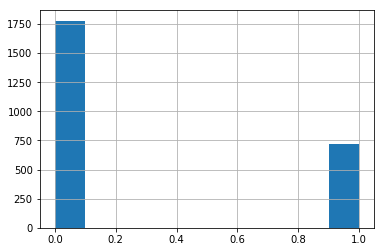

In [16]:
df['FUGA'].hist()

In [17]:
fuga_pct = (df["FUGA"].sum() / df["FUGA"].shape[0])*100
no_fuga_pct = 100 - (df["FUGA"].sum() / df["FUGA"].shape[0])*100
print("Pct of churners is %.2f%%." % fuga_pct)
print("Pct of no churners is %.2f%%." % no_fuga_pct)

Pct of churners is 28.88%.
Pct of no churners is 71.12%.


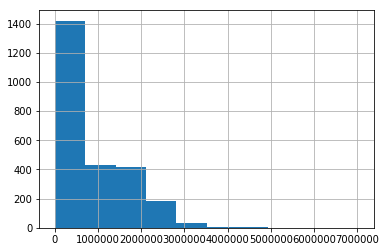

In [18]:
df['MONTO_ABONOS_NOMINA'].hist()

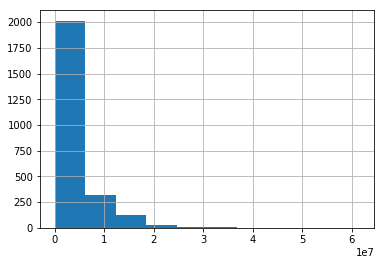

In [19]:
df['SALDO_ACTIVO'].hist()

In [20]:
df.groupby('FUGA').mean().round(2)

,ID,EDAD,ANIOS_ALTA,MES_DE_FUGA,SALDO_AHORROS,SALDO_FONDOS,SALDO_CREDITO1,SALDO_CREDITO2,SALDO_TARJETA,MONTO_COMPRAS1,MONTO_CAJERO1,MONTO_COMPRAS2,MONTO_CAJERO2,INDICADOR_MORA,MONTO_ABONOS_NOMINA,SALDO_ACTIVO,SALDO_PASIVO
FUGA,,,,,,,,,,,,,,,,,
0.0,1185.06,50.88,11.07,0.00,833577.65,125755.83,2720937.99,224401.05,713530.11,67187.63,25781.55,85488.79,734243.62,0.00,941485.45,3658869.19,981544.62
1.0,1411.64,44.13,9.16,6.24,189566.82,36559.86,846294.03,19979.29,254820.80,6787.48,965.84,16820.17,320037.11,0.05,273268.56,1121094.00,234593.44


- The average age of customers who left the company is lower than that of the customers who didn’t.

- Customers who left the company in average spent less in loans, credit cards, debit cards, withdraws and recive less in payroll than those who didn't leave the company.

- Customers who stayed in the company were never behind their bills.

In [21]:
df.groupby('ESTADO_CIVIL').mean().round(2)

,ID,FUGA,EDAD,ANIOS_ALTA,MES_DE_FUGA,SALDO_AHORROS,SALDO_FONDOS,SALDO_CREDITO1,SALDO_CREDITO2,SALDO_TARJETA,MONTO_COMPRAS1,MONTO_CAJERO1,MONTO_COMPRAS2,MONTO_CAJERO2,INDICADOR_MORA,MONTO_ABONOS_NOMINA,SALDO_ACTIVO,SALDO_PASIVO
ESTADO_CIVIL,,,,,,,,,,,,,,,,,,
CASADO,967.52,0.24,56.19,13.05,1.59,721534.21,100103.70,2269723.77,215766.71,723506.75,75236.87,20615.76,59149.17,582240.29,0.01,739126.94,3208997.24,823805.26
DESCONOCIDO,711.78,0.06,98.78,16.56,0.17,1686744.43,1114912.12,0.00,0.00,0.00,0.00,0.00,993.89,165740.74,0.00,485460.45,0.00,2801656.32
DIVORCIADO,879.94,0.32,58.58,14.00,1.65,821182.96,96774.19,2185187.41,376009.00,529954.75,36089.79,5376.35,91583.95,417957.00,0.00,712518.40,3091151.26,917957.26
SEPARADO,1255.96,0.24,58.07,10.80,1.33,481466.99,35869.57,2301662.71,330412.72,615276.86,17585.05,11014.49,56343.93,558947.55,0.02,713355.88,3247352.23,517336.62
SOLTERO,1462.53,0.33,40.77,8.52,2.11,646640.53,101539.44,1975648.99,84176.44,520114.08,48970.64,17926.30,73510.70,629141.58,0.02,739144.53,2579939.46,776631.26
UNION LIBRE,1421.28,0.32,43.26,8.93,1.86,485168.14,82269.74,2308910.82,277249.71,579649.59,25047.09,24667.52,58977.48,714774.08,0.02,807835.13,3165810.14,567437.92
VIUDO,967.21,0.19,69.34,13.64,1.16,622742.07,48778.36,3023321.78,26887.21,278251.68,8599.89,5401.46,72402.79,549109.47,0.01,770677.44,3328460.68,777439.82


- The 3 marital status that have the highest average churn are: Single, Divorced and Free Union (Union libre)
- The average age of single customers is the lower in all marital status. They are in average the newest customers. 
- The widower group spent the most in consupmtion loans.
- Divorced people in average spent the most in mortgage loans.
- Married people in average spent the most in credit cards  

In [22]:
df.groupby('SITUACION_LABORAL').mean().round(2)

,ID,FUGA,EDAD,ANIOS_ALTA,MES_DE_FUGA,SALDO_AHORROS,SALDO_FONDOS,SALDO_CREDITO1,SALDO_CREDITO2,SALDO_TARJETA,MONTO_COMPRAS1,MONTO_CAJERO1,MONTO_COMPRAS2,MONTO_CAJERO2,INDICADOR_MORA,MONTO_ABONOS_NOMINA,SALDO_ACTIVO,SALDO_PASIVO
SITUACION_LABORAL,,,,,,,,,,,,,,,,,,
CONTRATO AUTONOMO,895.40,0.34,53.90,13.63,2.10,923619.42,134638.15,1643268.36,353890.63,1352967.53,232495.51,15814.21,34917.13,181729.47,0.01,86927.16,3350126.78,1066993.75
CONTRATO FIJO,1379.39,0.32,41.49,9.13,1.97,463956.35,39364.57,2336872.04,182754.43,692219.82,48946.19,25731.40,72885.26,734379.82,0.02,830185.02,3211846.29,507911.84
CONTRATO TEMPORAL,1595.90,0.40,39.00,7.47,2.52,331185.20,15753.42,2119813.63,108898.09,604668.67,21335.17,20408.68,47328.74,625780.06,0.03,675403.70,2833380.27,364723.24
OTROS,992.99,0.18,62.24,13.11,1.13,960856.75,190880.70,2364599.51,102275.57,259317.32,23057.89,9699.45,78599.35,542736.71,0.00,827716.49,2726192.38,1194533.47
SIN CLASIFICAR,822.76,0.15,68.72,14.71,1.10,1310075.37,448821.52,0.00,383555.94,160546.74,42227.03,2439.02,22754.81,607390.26,0.01,847451.51,544102.64,1758896.95


- People with a temporary contract have the highest churn, they are the youngest and spend less time with the company in average.
- People with an autonomus contract in average spent more in credit cards than the other groups
- People with a fixed contract in average spent more in debit cards than the other groups
- People with an unclassified contract recieved more on their payroll than the other groups in average

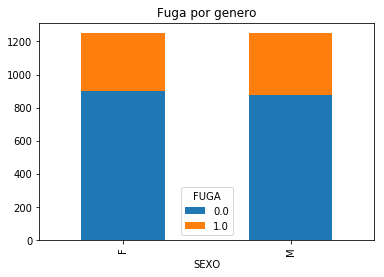

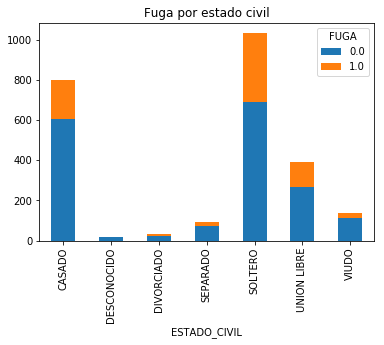

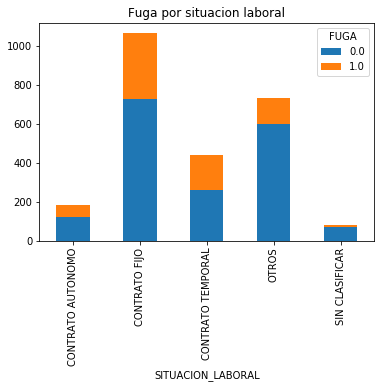

In [23]:
#Visualizations
df.groupby(['SEXO', 'FUGA']).size().unstack().plot(kind='bar', stacked=True, title='Fuga por genero')
df.groupby(['ESTADO_CIVIL', 'FUGA']).size().unstack().plot(kind='bar',stacked=True, title='Fuga por estado civil')
df.groupby(['SITUACION_LABORAL', 'FUGA']).size().unstack().plot(kind='bar',stacked=True, title='Fuga por situacion laboral')

### 3. Building a Predicitive Model

In [24]:
# importing modules
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score

#### 3.1 Pre-Processing Data

In [25]:
# Encode categorical columns
to_enconde = ['SEXO', 'ESTADO_CIVIL', 'SITUACION_LABORAL']
le = LabelEncoder()
for col in to_enconde:
    le.fit(df[col])
    df[col] = le.transform(df[col])

In [26]:
# Specify seed for reproducable results
seed = 20

# Split data into features and response
features = ['SEXO', 'ESTADO_CIVIL','SITUACION_LABORAL', 'SALDO_AHORROS', 'SALDO_FONDOS', 'SALDO_CREDITO1',
            'SALDO_CREDITO2', 'SALDO_TARJETA', 'MONTO_COMPRAS1', 'MONTO_CAJERO1','MONTO_COMPRAS2', 
            'MONTO_CAJERO2', 'MONTO_ABONOS_NOMINA','INDICADOR_MORA', 'SALDO_ACTIVO', 'SALDO_PASIVO', 
            'EDAD', 'ANIOS_ALTA']

X = df[features].values
y = df['FUGA'].values

In [27]:
#Standarized features
scaler = StandardScaler()
X = scaler.fit_transform(X.astype(np.float))

In [28]:
#Split dataframe into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=seed)

#### 3.2. Predictive models

For this classification problem I will try 4 different models:

- Support Vector Machine
- Logistic Regression
- Decision Tree
- Bagging Classifier

But first, let's find the best parameters for Bagging Classifier:

In [29]:
# Bagging Classifier
clf = BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=20, bootstrap=True,
                        random_state=seed, n_jobs=-1, oob_score=True)

clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
f1_score(y_pred, y_test), accuracy_score(y_pred, y_test)

(0.8878504672897195, 0.936)

(0.944, 69)


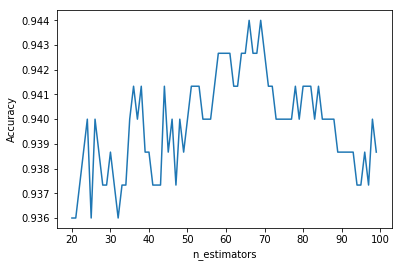

In [30]:
# list of values to try for n_estimators
estimator_range = range(20, 100, 1)

# list to store the average Accuracy for each value of n_estimators
accuracy_scores = []

#look for the best n_estimator
for estimator in estimator_range:
    clf = BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=estimator, bootstrap=True,
                        random_state=seed, n_jobs=-1, oob_score=True)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy_scores.append(accuracy_score(y_pred, y_test))

#Plot results
plt.plot(estimator_range, accuracy_scores)
plt.xlabel('n_estimators')
plt.ylabel('Accuracy')
print(sorted(zip(accuracy_scores, estimator_range))[::-1][0])

Best n_estimator for Bagged Decision Trees is 69.

#### 3.3. Evaluating different models:

In [31]:
# Define models
models = {'Logistic Regression': LogisticRegression(solver='liblinear',random_state=seed),
          'SVM': SVC(kernel='rbf', gamma='auto'),
          'Decision Tree': DecisionTreeClassifier(max_depth=None, random_state=seed),
          'Bagging Classifier': BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=69, bootstrap=True,random_state=seed, n_jobs=-1, oob_score=True)}

# Training each model
for model in models.keys():
    models[model].fit(X_train, y_train)

# predict test for each model
y_pred = pd.DataFrame(columns=models.keys())
for model in models.keys():
    y_pred[model] = models[model].predict(X_test)

# Evaluate each model
results = []
for model in models.keys():
    results.append({'F-1 Score': f1_score(y_pred[model], y_test), 
                    'Accuracy': accuracy_score(y_pred[model], y_test),
                    'ROC AUC':roc_auc_score(y_pred[model], y_test)})

results = pd.DataFrame(data=results, index=models.keys())
results

,Accuracy,F-1 Score,ROC AUC
Logistic Regression,0.881333,0.800895,0.860554
SVM,0.904000,0.846154,0.881532
Decision Tree,0.916000,0.861538,0.899157
Bagging Classifier,0.944000,0.901869,0.947613


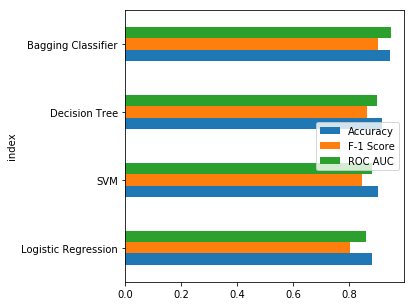

In [32]:
results.reset_index().groupby('index').mean().sort_values('ROC AUC').plot(kind='barh', figsize=(5,5))

Bagging Classifier is the best model in terms of **ROC AUC,** **F-1 Score** and **Accuracy**

#### 3.4. Feature Importance from Bagging Classifier


In [33]:
# Get Feature Importance from Bagging Classifier
feature_importance = np.mean([tree.feature_importances_ for tree in clf.estimators_], axis=0)
feature_importance = pd.DataFrame({'importance':feature_importance}, index=features).sort_values('importance')
feature_importance

,importance
MONTO_CAJERO1,0.000638
SALDO_CREDITO2,0.000796
MONTO_COMPRAS1,0.002057
SALDO_FONDOS,0.003652
SEXO,0.005363
MONTO_COMPRAS2,0.006356
ESTADO_CIVIL,0.010520
MONTO_CAJERO2,0.010660
SALDO_CREDITO1,0.013429
SITUACION_LABORAL,0.014641


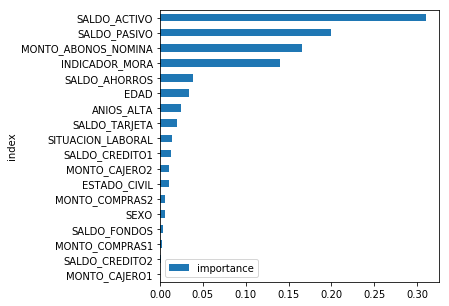

In [34]:
feature_importance.reset_index().groupby('index').mean().sort_values('importance', ascending=True).plot(kind='barh', figsize=(5,5))